In [36]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [37]:
%pip install matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
data = pd.read_csv(r'C:\Users\PRAJKTA\Downloads\SensorData.csv')
data.head()

,X-direction,Y-direction,Z-direction,Error_found
0,0.31,1.02,-9.18,no
1,-0.78,0.98,-9.10,no
2,0.04,0.67,-8.28,no
3,-0.04,0.90,-8.16,no
4,0.00,1.26,-7.77,no


In [39]:
data.shape 

(1082, 4)

In [40]:
data.isnull().sum() 

X-direction    0
Y-direction    0
Z-direction    0
Error_found    0
dtype: int64

In [41]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X-direction  1082 non-null   float64
 1   Y-direction  1082 non-null   float64
 2   Z-direction  1082 non-null   float64
 3   Error_found  1082 non-null   object 
dtypes: float64(3), object(1)
memory usage: 33.9+ KB


In [42]:
data['ErrorA_Found']= data['Error_found'].map({ 'no': 0, 'yes': 1}) 

In [43]:
import matplotlib.pyplot as plt

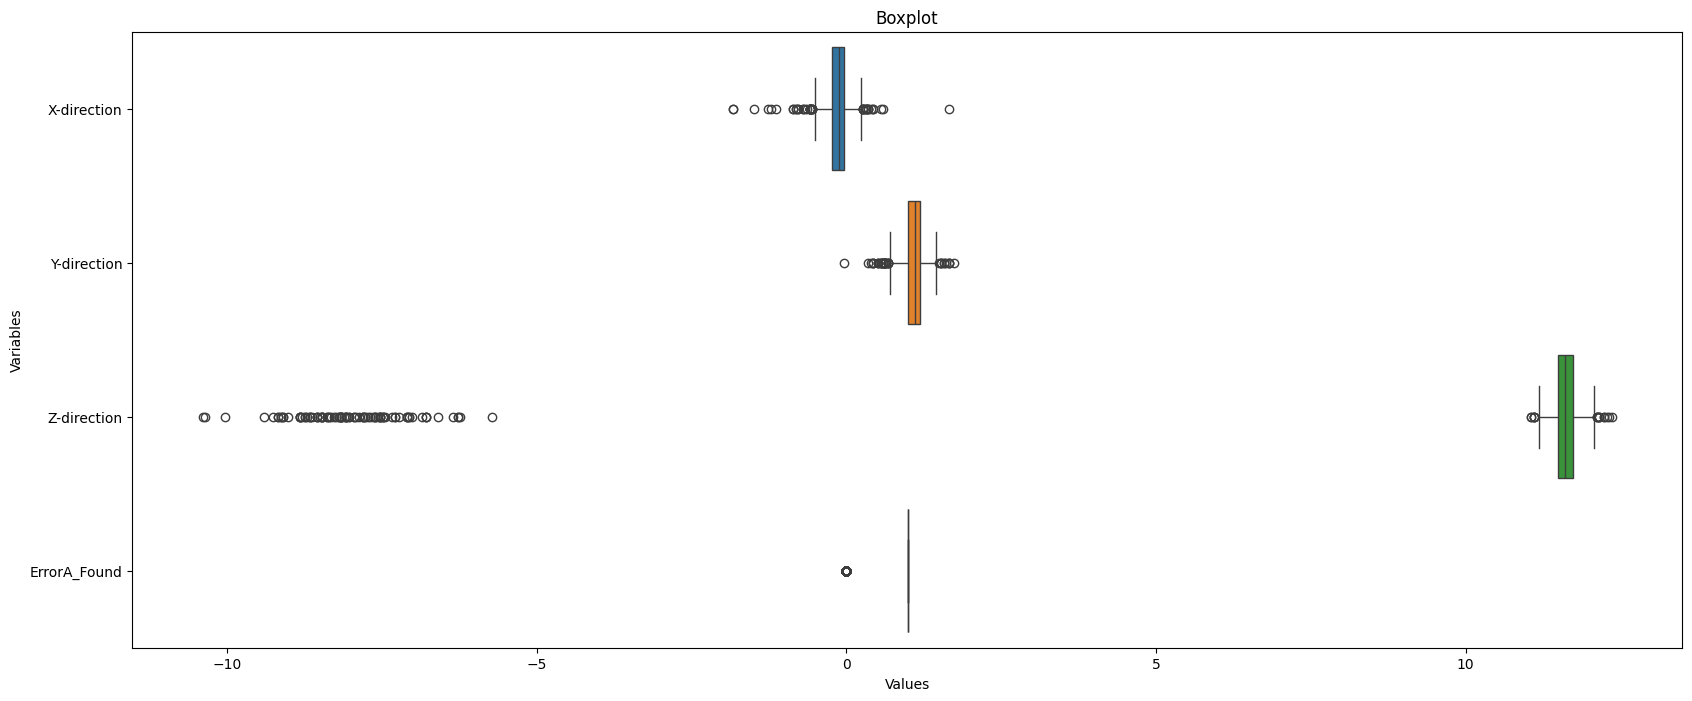

In [44]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=data, orient='h')
plt.title("Boxplot")
plt.xlabel("Values")
plt.ylabel("Variables") 
plt.show()

In [45]:
def replace_outliers_with_mean_percentile(data, lower_percentile=5, upper_percentile=95):

    for column in data.select_dtypes (include='number').columns:

        lower_bound = np.percentile(data[column], lower_percentile)
        upper_bound = np.percentile(data[column], upper_percentile)
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    data.loc[outliers, column] = data[column].mean()

replace_outliers_with_mean_percentile(data) 

C:\Users\PRAJKTA\AppData\Local\Temp\ipykernel_22196\1913942115.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7698706099815157' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[outliers, column] = data[column].mean()


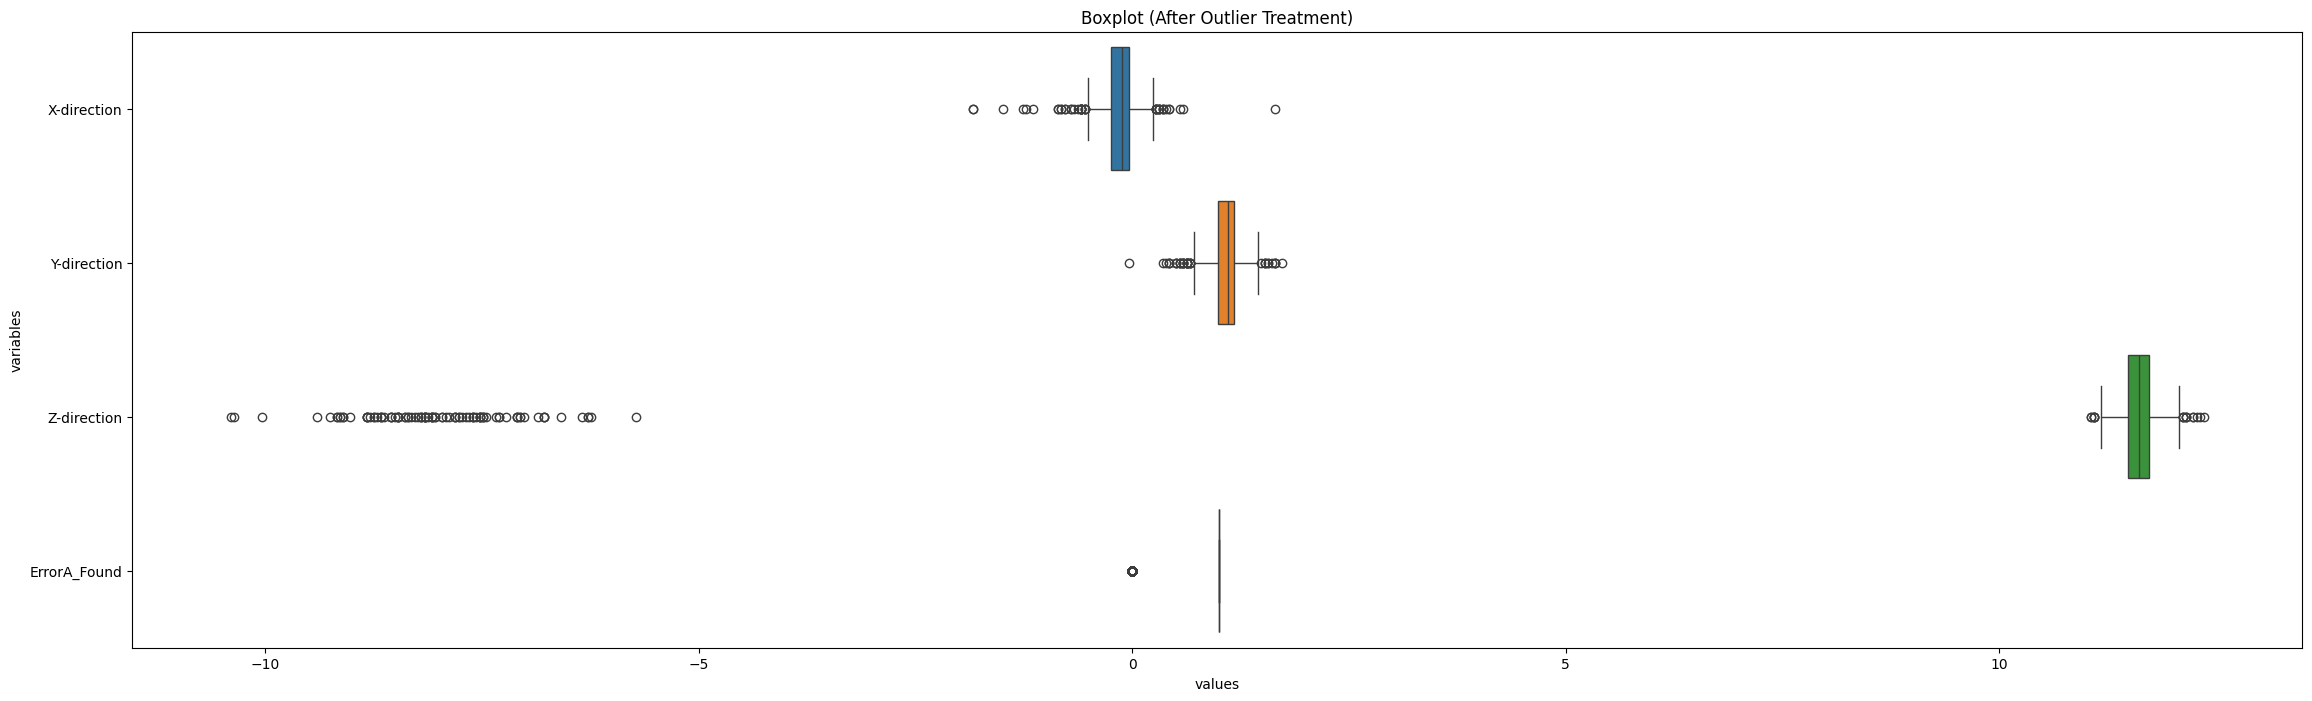

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(28, 8))
sns.boxplot(data=data, orient='h') 
plt.title("Boxplot (After Outlier Treatment)")
plt.xlabel('values')
plt.ylabel('variables')
plt.show()

In [47]:
data.describe()

,X-direction,Y-direction,Z-direction,ErrorA_Found
count,1082.000000,1082.000000,1082.000000,1082.000000
mean,-0.130176,1.087421,9.861155,0.769871
std,0.209577,0.174106,5.657546,0.421110
min,-1.840000,-0.040000,-10.400000,0.000000
25%,-0.240000,0.990000,11.490000,1.000000
50%,-0.120000,1.100000,11.610000,1.000000
75%,-0.040000,1.180000,11.730000,1.000000
max,1.650000,1.730000,12.360000,1.000000


MILESTONE 2

In [48]:
data['ErrorA_Found'].value_counts()

ErrorA_Found
1.0    833
0.0    249
Name: count, dtype: int64

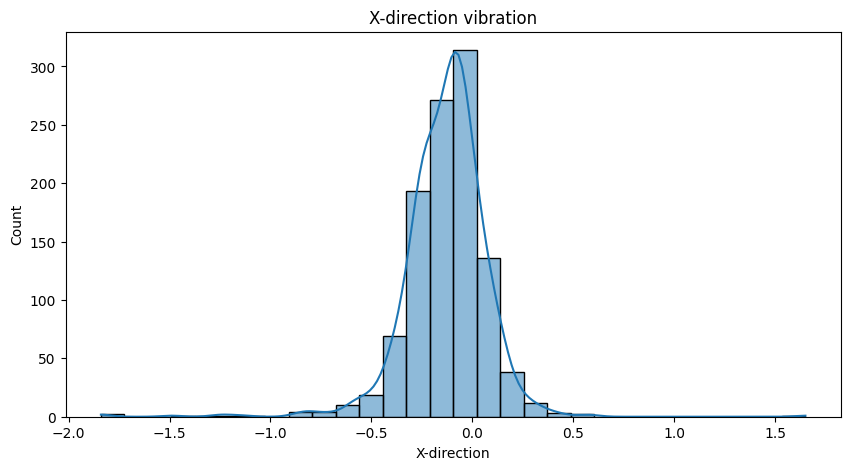

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(data['X-direction'], bins=30,kde=True)
plt.title('X-direction vibration')
plt.show()

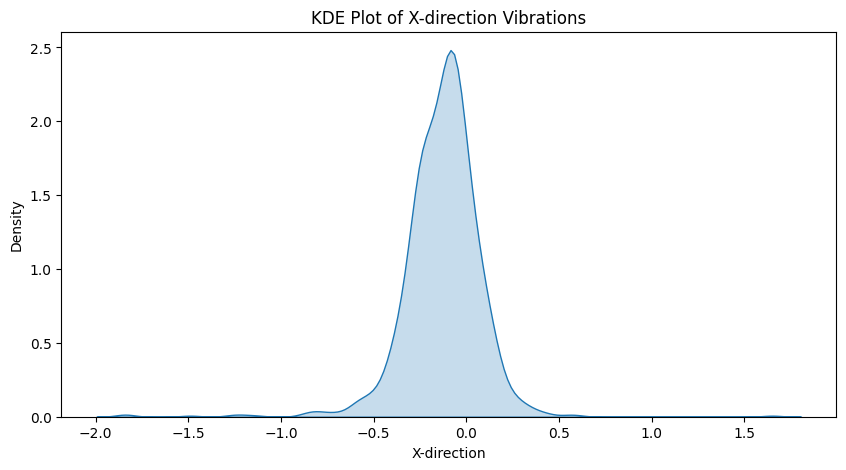

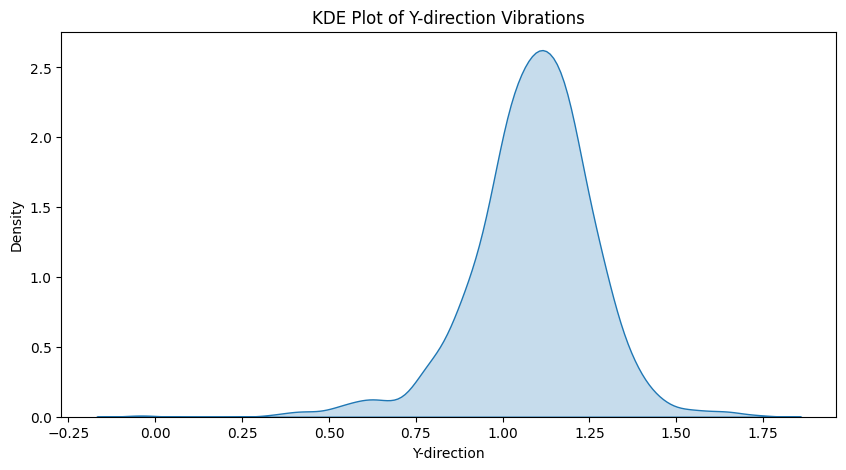

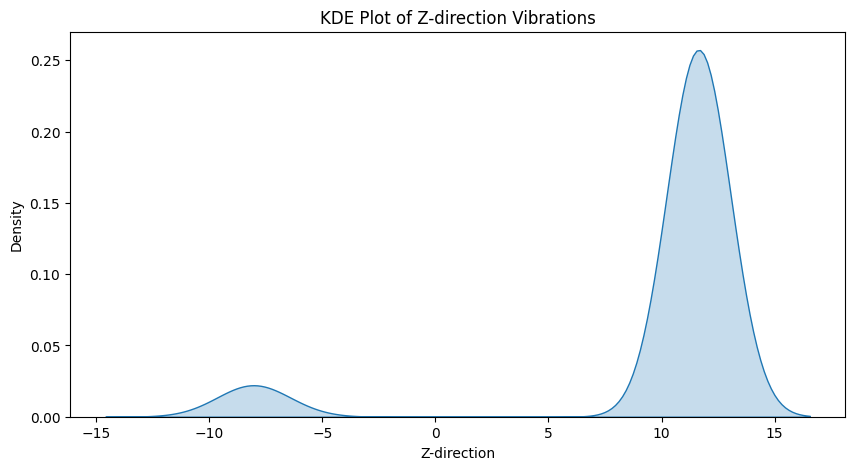

In [50]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data['X-direction'], fill=True) # Changed shade to fill
plt.title('KDE Plot of X-direction Vibrations')
plt.xlabel('X-direction')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(data['Y-direction'], fill=True) # Changed shade to fill
plt.title('KDE Plot of Y-direction Vibrations')
plt.xlabel('Y-direction')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(data['Z-direction'], fill=True) # Changed shade to fill
plt.title('KDE Plot of Z-direction Vibrations')
plt.xlabel('Z-direction')
plt.ylabel('Density')
plt.show()

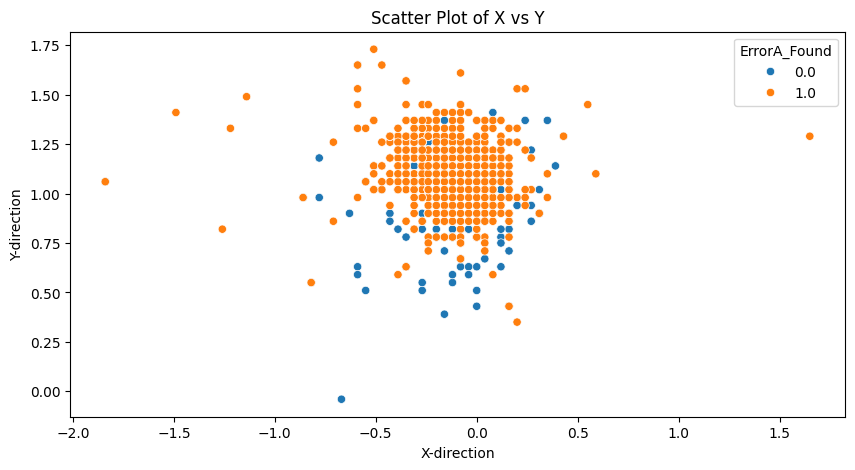

In [51]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='X-direction', y='Y-direction', hue='ErrorA_Found', data=data)
plt.title('Scatter Plot of X vs Y')
plt.xlabel('X-direction')
plt.ylabel('Y-direction')
plt.show()

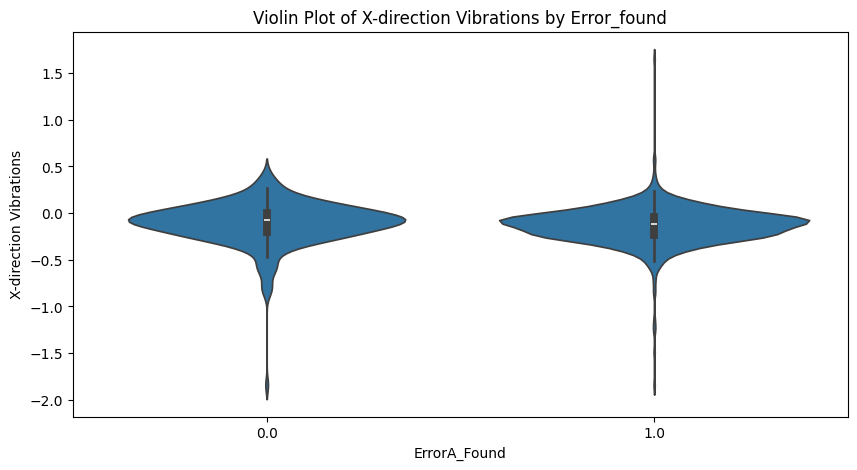

In [52]:
plt.figure(figsize=(10, 5))

sns.violinplot(x='ErrorA_Found', y='X-direction', data=data)
plt.title('Violin Plot of X-direction Vibrations by Error_found')
plt.xlabel('ErrorA_Found')
plt.ylabel('X-direction Vibrations')
plt.show()

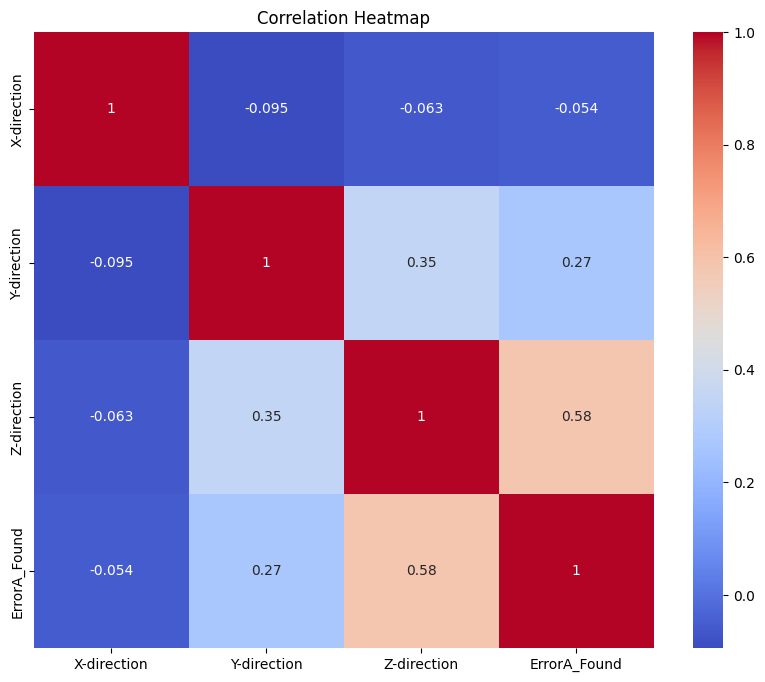

In [53]:
numeric_data = data.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [54]:
x = data[['X-direction', 'Y-direction', 'Z-direction']]
y = data['ErrorA_Found']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
y_train.value_counts()

ErrorA_Found
1.0    665
0.0    200
Name: count, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from imblearn.over_sampling import SMOTE  # Note: It's SMOTE not SWOTE
smote = SMOTE()
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)
print(y_train_res.value_counts())
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train_res, y_train_res)  # Use the resampled data

ErrorA_Found
1.0    665
0.0    665
Name: count, dtype: int64


LogisticRegression()

In [58]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [59]:
# Random Forest Classifier
rf = RandomForestClassifier()

param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5) 
grid_rf.fit(x_train, y_train) 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [60]:
svc = SVC()

param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svc = GridSearchCV(svc, param_grid_svc, cv=5)
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform','distance']}

grid_knn = GridSearchCV(knn, param_grid_knn, cv=5)

grid_knn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [62]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()

param_grid_xgb = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5)
grid_xgb.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7]})

In [64]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

MILESTONE 4


In [65]:
from sklearn.metrics import roc_auc_score

# Function to calculate and print evaluation metrics 
def evaluate_model(model, x_test, y_test, model_name):
    y_pred = model.predict(x_test)
    print(f"\n{model_name}:")
    print(classification_report(y_test, y_pred))

    # Calculate and print accuracy  
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    try:
        roc_auc = roc_auc_score(y_test, y_pred)
        print(f"ROC AUC Score: {roc_auc:.4f}")
    except (ValueError, AttributeError):
        print("ROC AUC Score: Not applicable")

# Evaluate Logistic Regression
evaluate_model(log_reg, x_test, y_test, "Logistic Regression")

# Evaluate Random Forest (using best estimator from GridSearchCV)
evaluate_model(grid_rf.best_estimator_, x_test, y_test, "Random Forest")

# Evaluate Support Vector classifier (using best estimator from GridSearchCV)
evaluate_model(grid_svc.best_estimator_, x_test, y_test, "Support Vector classifler")

# Evaluate K-Nearest Neighbors (KNN) (using best estimator from GridSearchCV)
evaluate_model(grid_knn.best_estimator_, x_test, y_test, "K-Nearest Neighbors (KNN)")

# Evaluate XGBoost Classifier (using best estimator from GridSearchCV)
evaluate_model(grid_xgb.best_estimator_, x_test, y_test, "XGBoost Classifier")

# Evaluate Naive Bayes
evaluate_model(nb, x_test, y_test, "Naive Bayes")


Logistic Regression:
              precision    recall  f1-score   support

         0.0       1.00      0.49      0.66        49
         1.0       0.87      1.00      0.93       168

    accuracy                           0.88       217
   macro avg       0.94      0.74      0.79       217
weighted avg       0.90      0.88      0.87       217

Accuracy: 0.8848
ROC AUC Score: 0.7449

Random Forest:
              precision    recall  f1-score   support

         0.0       0.77      0.49      0.60        49
         1.0       0.87      0.96      0.91       168

    accuracy                           0.85       217
   macro avg       0.82      0.72      0.75       217
weighted avg       0.84      0.85      0.84       217

Accuracy: 0.8525
ROC AUC Score: 0.7241

Support Vector classifler:
              precision    recall  f1-score   support

         0.0       1.00      0.49      0.66        49
         1.0       0.87      1.00      0.93       168

    accuracy                          

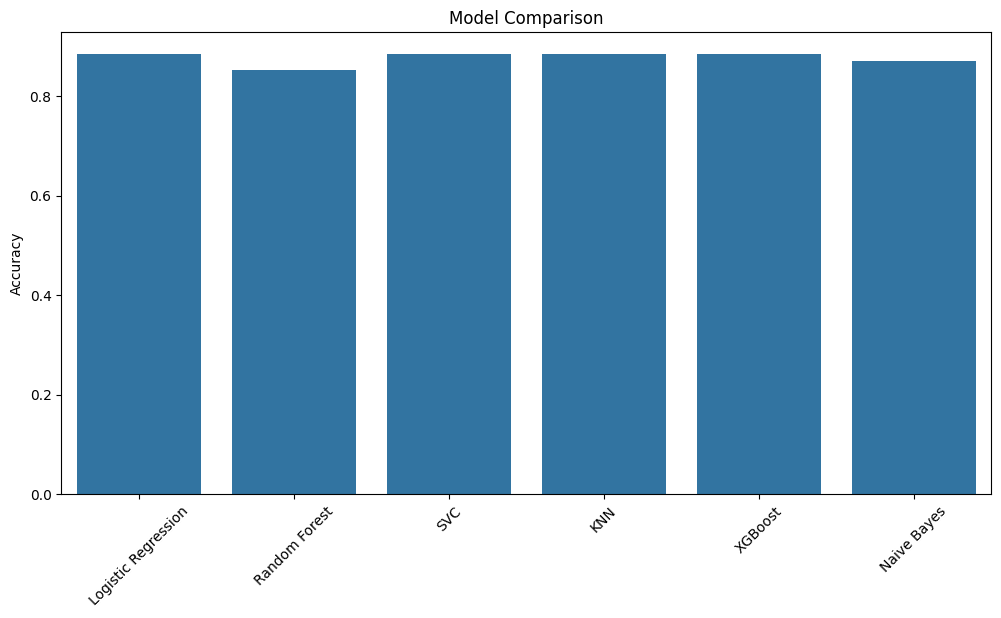

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions for each model
y_pred_log_reg = log_reg.predict(x_test)
y_pred_rf = grid_rf.best_estimator_.predict(x_test)
y_pred_svc = grid_svc.best_estimator_.predict(x_test)
y_pred_knn = grid_knn.best_estimator_.predict(x_test)
y_pred_xgb = grid_xgb.best_estimator_.predict(x_test)
y_pred_nb = nb.predict(x_test)

models = ['Logistic Regression', 'Random Forest', 'SVC', 'KNN', 'XGBoost', 'Naive Bayes']
accuracies = [
    accuracy_score(y_test, y_pred_log_reg), 
    accuracy_score(y_test, y_pred_rf), 
    accuracy_score(y_test, y_pred_svc),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_nb)
]

plt.figure(figsize=(12, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show() 



In [67]:
# Suggesting the Best Model
import numpy as np
best_model_index = np.argmax(accuracies)

best_model_name = models[best_model_index]

print(f"The best model is: {best_model_name} with an accuracy of {accuracies[best_model_index]:.2f}")

The best model is: Logistic Regression with an accuracy of 0.88


In [68]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# 1) Base model
base_svc = SVC()

# 2) Hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# 3) Instantiate and fit
grid_svc = GridSearchCV(
    estimator=base_svc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)
# Fit the model using the training data
grid_svc.fit(x_train, y_train)

# 4) Now this works
svc_model = grid_svc.best_estimator_

# Assign the best trained model to the 'model' variable used for prediction
model = svc_model

# Set seed for reproducibility
np.random.seed(42)

# Inform user about making predictions on the actual test set
print("Making predictions on the actual test set:")

# Use the actual test data X_test and y_test
y_test_actual = y_test
x_test_actual = x_test

# Predict the labels for the test samples using the trained model
y_test_pred = model.predict(x_test_actual) # Use the updated 'model' variable

# Print the model's predictions and the actual correct answers
print("\nPredictions vs Actual Labels (on test set):")
for i in range(len(y_test_actual)):
    print(f"Sample {i+1}: Prediction = {y_test_pred[i]}, Actual = {y_test_actual.iloc[i]}")

# Calculate and print the accuracy of the model on the test set
accuracy = accuracy_score(y_test_actual, y_test_pred)
print(f"\nModel Accuracy on Test Set: {accuracy * 100:.2f}%")

Making predictions on the actual test set:

Predictions vs Actual Labels (on test set):
Sample 1: Prediction = 0.0, Actual = 0.0
Sample 2: Prediction = 1.0, Actual = 1.0
Sample 3: Prediction = 1.0, Actual = 1.0
Sample 4: Prediction = 1.0, Actual = 1.0
Sample 5: Prediction = 0.0, Actual = 0.0
Sample 6: Prediction = 1.0, Actual = 1.0
Sample 7: Prediction = 1.0, Actual = 1.0
Sample 8: Prediction = 1.0, Actual = 1.0
Sample 9: Prediction = 0.0, Actual = 0.0
Sample 10: Prediction = 1.0, Actual = 1.0
Sample 11: Prediction = 1.0, Actual = 1.0
Sample 12: Prediction = 1.0, Actual = 1.0
Sample 13: Prediction = 1.0, Actual = 0.0
Sample 14: Prediction = 1.0, Actual = 1.0
Sample 15: Prediction = 1.0, Actual = 1.0
Sample 16: Prediction = 1.0, Actual = 1.0
Sample 17: Prediction = 1.0, Actual = 1.0
Sample 18: Prediction = 1.0, Actual = 1.0
Sample 19: Prediction = 1.0, Actual = 1.0
Sample 20: Prediction = 1.0, Actual = 1.0
Sample 21: Prediction = 1.0, Actual = 0.0
Sample 22: Prediction = 1.0, Actual = 1